### Crime Rates in Expensive Neighborhoods

Esse notebook tem como objetivo explanar o método de Regressão, que é utilizado por algoritmos de Aprendizado de Máquina para estimar e prever certas informações. O projeto foi criado durante o curso de <b>Machine Learning: Regression</b> ministrado pela University of Washington no Coursera. A base utilizada também foi disponibilizada durante o curso (e pelo curso).

A regressão simples tem como objetivo traçar uma reta no plano cartesiano referente aos valores utilizados para basear a predição e os valores da predição. A reta visa minimizar o Residual Sum Of Squares (RSS), também chamado de Erro, que é a distância da reta criada para o valor real da predição. Ela também deve ser Linear (no caso da Regressão Simples). A reta obedece o seguinte equação:

$$\hat{y} = \hat{w}_{0}+ \hat{w}_{1}x$$

- y  = reta gerada
- wo = valor b da reta
- w1 = valor a, a ser multiplicado por x
- x  = valor para basear a predição

Dessa forma, para obter a melhor reta possível que melhor se adequa aos nossos dados, devemos minimizar os erros testando novos valores para <i>wo</i> e <i>w1</i> de maneira automatizada. Podemos fazer teste com esses valores visando minimizar o Residual Sum Of Squares (RSS)

#### Importar bibliotecas e carregar dados

In [52]:
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd

#### Carregar e visualizar dados

A base utilizada foi disponibilizada pela University of Washington e contém preço de casas e o indíce criminal daquela determinada região.

In [53]:
sales = pd.read_csv("Philadelphia_Crime_Rate_noNA.csv")
sales.head()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks


Realizar uma visualização das taxas de crime relacionada com os preços das casas

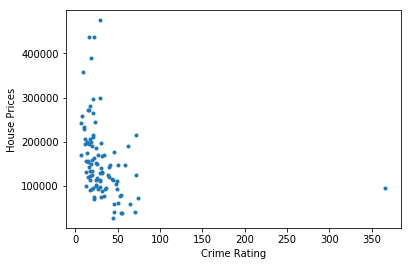

In [54]:
plt.scatter(sales['CrimeRate'], sales['HousePrice'], marker='.')
plt.xlabel('Crime Rating')
plt.ylabel('House Prices')
plt.show()

### Modelo de Regressão Linear Simples

Vamos criar um modelo que tem como entrada a taxa de crimes daquela determinada região e o preço.

In [55]:
crime_rate  = (sales['CrimeRate'].values).reshape(-1, 1)
house_price = (sales['HousePrice'].values)

In [56]:
crime_model = sk.linear_model.LinearRegression().fit(crime_rate, house_price)

##### Plotando a curva do modelo e vendo como se comporta com os dados

Text(0, 0.5, 'House Prices')

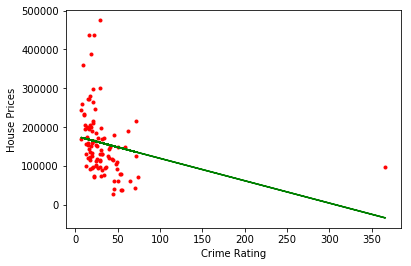

In [57]:
plt.scatter(crime_rate, house_price, color = "red", marker='.')
plt.plot(crime_rate, crime_model.predict(crime_rate), color = "green")
plt.xlabel('Crime Rating')
plt.ylabel('House Prices')

A existência de um outlier está afetando no desempenho do modelo. Vamos removê-lo e ver como a curva se comporta. A análise já foi feita e o outlier se encontra em uma região onde <b>'MilesPhila' == 0.0 <\b>

##### Removendo o Outlier e refazendo a análise

In [58]:
sales_no_OUT = sales[sales['MilesPhila'] != 0.0]

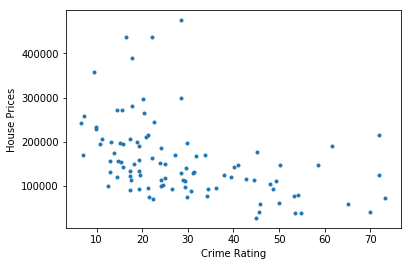

In [59]:
plt.scatter(sales_no_OUT['CrimeRate'], sales_no_OUT['HousePrice'], marker='.')
plt.xlabel('Crime Rating')
plt.ylabel('House Prices')
plt.show()

In [60]:
crime_rate  = (sales_no_OUT['CrimeRate'].values).reshape(-1, 1)
house_price = (sales_no_OUT['HousePrice'].values)

In [61]:
crime_model_no_OUT = sk.linear_model.LinearRegression().fit(crime_rate, house_price)

##### Plotando a curva do modelo sem o Outlier

Text(0, 0.5, 'House Prices')

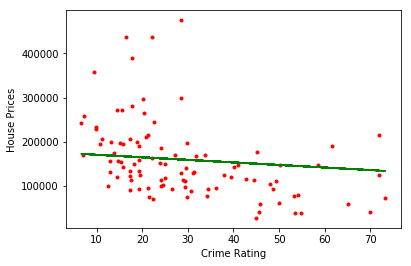

In [62]:
plt.scatter(crime_rate, house_price, color = "red", marker='.')
plt.plot(crime_rate, crime_model.predict(crime_rate), color = "green")
plt.xlabel('Crime Rating')
plt.ylabel('House Prices')

##### Comparando o modelo com outlier e o modelo sem outlier

In [69]:
print('With Outlier')
print('intercept: ', crime_model.intercept_)
print('slope:     ', crime_model.coef_)

With Outlier
intercept:  176629.40810695427
slope:      [-576.90812768]


In [70]:
print('No Outlier')
print('intercept: ', crime_model_no_OUT.intercept_)
print('slope:     ', crime_model_no_OUT.coef_)

No Outlier
intercept:  225233.55183900383
slope:      [-2288.68942995]


A gente aqui observa como o outlier afetou no intercept. É uma diferença enorme! Cerca de 2,287.

##### Chegamos a um resultado satisfatório?

Apesar de removermos um outlier, é preciso fazer uma reanálise no gráfico de distibuição acima para ver se nosso modelo pode ser ainda mais otimizado. Existem cerca de 5 invidíduos que estão acima da faixa de preço de 300.000 que se encontram isolados mediante a todo o resto do fluxo dos dados. Que tal fazermos um teste removendo eles?

### Removendo os valores altos com preço acima dos 300.000

In [71]:
sales_nohighend = sales_no_OUT[sales_no_OUT['HousePrice'] < 300000]

In [72]:
crime_rate  = (sales_nohighend['CrimeRate'].values).reshape(-1, 1)
house_price = (sales_nohighend['HousePrice'].values)

In [73]:
crime_model_nohighend = sk.linear_model.LinearRegression().fit(crime_rate, house_price)

##### Comparando o modelo sem outlier e o modelo sem os valores altos

In [74]:
print('With Outlier And HighEnds')
print('intercept: ', crime_model_nohighend.intercept_)
print('slope:     ', crime_model_nohighend.coef_)

With Outlier And HighEnds
intercept:  199098.85266980444
slope:      [-1838.56264859]


Parece que a eficiência não é a mesma. Acontece que certos valores altos ajudam a identificar pequenos desvios no padrão dos dados, o que ajuda na eficácia do do nosso modelo. Nesse caso, optaremos apenas pelo modelo sem outlier e com highends!

##### Mas afinal o que é intercept e slope?

Tive que revisar pois não conseguia responder de uma maneira entendível. Mas basicamente, dada uma reta r que obedeça uma função linear de regressão logística simples, intercept é o ponto que a reta toca no eixo y, e slope é a variável que multiplica o ponto x. Dessa forma, no nosso caso, a base sem o outlier melhorou pois o intercept subiu e se aproximou mais dos pontos de interesse, ficou bem mais centralizado do que antes, além do slope, que se tornou mais referente aos pontos próximos da reta. Dessa forma, a perfomance se tornou mais adequada aos dados normalizados. A grosso modo:

$$reta = intercept + slope.x$$